### <strong>第六次作品：限制條件下之多變量函數參數估計與模擬</strong>
學號：410979068

姓名：施尚丞

<hr>

 <font color= skyblue, fontweight='bold'>作品目標</font>： <br> 
目標：
1. 了解雙變量函數的形狀和圖形呈現，在這個過程中更了解該函數的重點，協助我未來更好的熟悉該領域。 <br> 
2. 結合先前的知識和專題經驗，應用多變量函數的限制式、計算MLE等等技巧，持續在統計的領域加深經驗。<br> 

範例 1：繪製 Mesh 與 Surface 立體圖

繪製函數 $f(x,y) = xe^{-x^2-y^2}$ 的立體網格圖。

計算函數 $f(x,y)$ 的最小值。

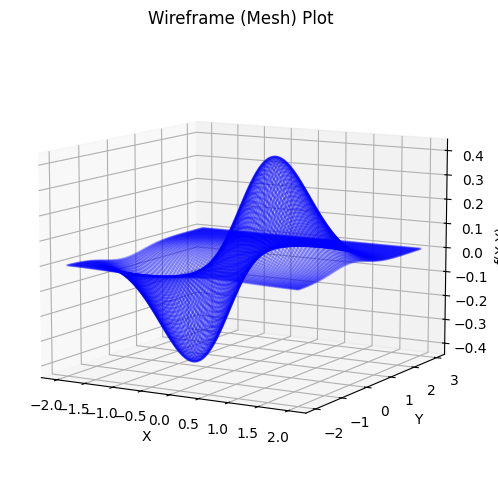

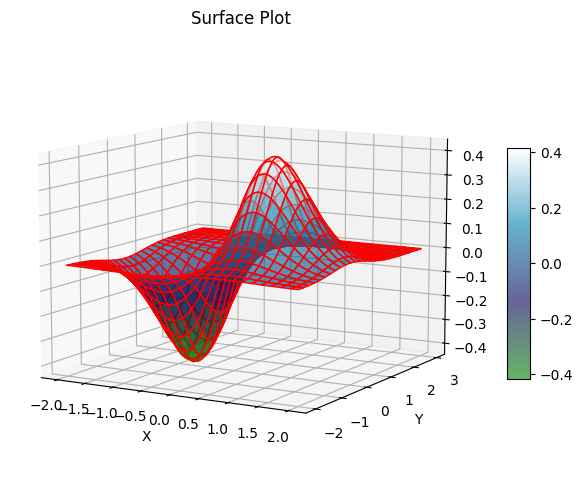

In [24]:
import numpy as np
import matplotlib.pyplot as plt
 
 
f = lambda x : x[0] * np.exp(-x[0]**2 - x[1]**2)
 
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 3, 100)
X, Y = np.meshgrid(x, y) # mesh grid matric
Z = f([X, Y])
 
# for wireframe, control the wire density by rstride and cstride
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, Z, color ='blue',
    alpha=0.3, rstride = 1, cstride = 1)
ax.set_xlabel('X'), ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
ax.view_init(10, -60)  #(elev=-165, azim=60)
plt.title('Wireframe (Mesh) Plot')
plt.show()
 
# for surface 3D plot
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
surf = ax.plot_surface(X, Y, Z, color = 'r', \
    rstride=4, cstride=4, alpha =0.6, cmap='ocean') # cmap = plt.cm.bone
 # cmap = plt.cm.bone
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10) # aspect = length/width ratio
ax.view_init(10, -60)  #(elev=-165, azim=60)
ax.set_xlabel('X'), ax.set_ylabel('Y')
plt.title('Surface Plot')
plt.show()

**<font color=skyblue>注意事項與討論：</font>**<br>
學習如何寫出多變量函數的指令。

第一張圖稱為 mesh(wireframe) 圖，第二張稱為 surface 圖。

在指令 plot_wireframe 內的參數 “rstride” 與 “cstride” 用來控制網格的列與欄的密度，數值越小代表密度越高。讀者宜自行調整並觀察結果。

立體圖的觀賞角度有二： 仰角（elevation） 與水平角度（azimuth）. 一般而言，立體圖的兩個角度都必須經過調整,才能看到最好、最適合或最想呈現的部分，俟調整好後，紀錄兩個角度並放入指令參數中（view_init），以便讓每次的執行都能顯示出該觀賞角度。值得注意的是，在 jupyter notebook 的環境下，無法手動調整觀賞角度，必須在 python 環境才可以（py 檔）。

Mesh 圖以網格線呈現立體模樣，而 surface 則是以塗滿色彩取代格線的立體圖並搭配色彩拼盤 cmap. 請參考 matplotlib 手冊中關於 color map 的使用，譬如 plt.cm.bone。

surface 以色彩表達立體模樣，因此經常搭配一條 color bar 來表示高度數值。

範例 2：等高線圖 Contour plot

延續上個範例的函數, 繪製等高線圖。

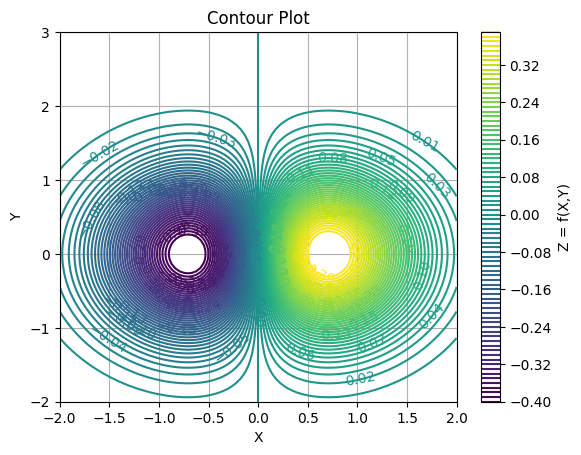

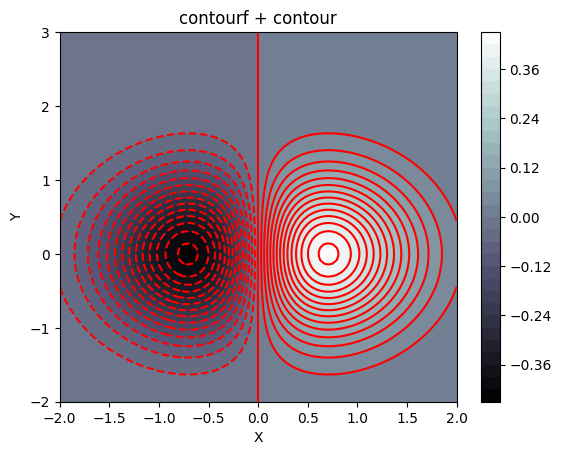

In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
 
f = lambda x : x[0] * np.exp(-x[0]**2 - x[1]**2)
 
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 3, 100)
X, Y = np.meshgrid(x, y) # mesh grid matric
Z = f([X, Y])
 
 
levels = np.arange(-0.4, 0.4, 0.01) # levels of contour lines
contours = plt.contour(X, Y, Z, levels=levels) # check dir(contours)
# add function value on each line    
plt.clabel(contours, inline = 0, fontsize = 10) # inline =1 or 0 
cbar = plt.colorbar(contours)
plt.xlabel('X'), plt.ylabel('Y')
cbar.ax.set_ylabel('Z = f(X,Y)') # set colorbar label
# cbar.add_lines(contours) # add contour line levels to the colorbar 
plt.title('Contour Plot')
plt.grid(True)
plt.show()
C1 = plt.contourf(X, Y, Z, 30, \
    cmap = plt.cm.bone)
C2 = plt.contour(C1, levels = C1.levels, \
    colors = 'r') # check dir(contours)
plt.colorbar(C1)
plt.xlabel('X'), plt.ylabel('Y')
plt.title('contourf + contour')  
plt.show()

**<font color=skyblue>注意事項與討論：</font>**<br>
等高線的線條代表某個函數值。而函數值大小通常以線條顏色表達。

繪製等高線必須決定等高線的數量或等高線的高度。下列程式碼分別展示這兩種做法。

除了以線條來展現函數值的大小，指令 contourf 則是使用塗滿區域顏色的方式表達數值大小。

下列程式碼也示範了 colorbar 的進一步技巧。
<br>

範例 3：混合貝他函數的參數估計 The $\beta$ mixture
給定 1000 筆資料，其直方圖如下所示。已知這些資料來自兩個貝他（\beta）分配組合的未知母體，其機率密度函數為

$f(x|\Omega) = \pi_1 \beta(x|a_1,b_1) + \pi_2 \beta(x|a_2, b_2)$

其中$\Omega=\{ \pi_1, \pi_2, a_1, b_1, a_2, b_2| \pi_1+\pi_2=1\}$ 為未知參數。請試著採取最大概似函數估計法 （MLE）估計未知參數 $\Omega$ ，即計算對數聯合概似函數的最大值

$\displaystyle \max_{\Omega = \{\pi_1, \pi_2, a_1, b_1, a_2, b_2|\pi_1 + \pi_2 =1, \pi_1, \pi_2, a_1, b_1, a_2, b_2 >0\}} \ln \Pi_{i=1}^{n} f(x_i|\Omega)$

目標函數寫為

$L(\Omega) = \ln \Pi_{i=1}^{n} f(x_i|\Omega) = \sum_{i=1}^n \ln(\pi_1 \beta(x_i|a_1, b_1) + \pi_2 \beta(x_i|a_2, b_2))$


依下列步驟模擬樣本的生成與參數估計

設定參數條件（scenario）,譬如， $\pi_1 = 0.7, a_1=2, b_1=9, a_2=3, b_2=3$, 樣本數 n = 1000。

根據上述的參數條件，繪製混合貝他分配的 PDF 圖，看看母體的長相。

根據上述參數條件，生成隨機樣本。

繪製隨機樣本的直方圖，如下圖。

計算 MLE 的最大值問題（限制式條件）。

使用估計後的參數值，繪製混合 PDF 圖，並與樣本直方圖、理論的混合 PDF 圖並陳，如右下圖

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -401.32854124299865
        x: [ 7.770e-01  1.919e+00  7.869e+00  4.152e+00  3.410e+00]
      nit: 21
      jac: [-1.357e-02 -5.980e-03 -2.527e-02  3.650e-02  1.358e-02]
     nfev: 150
     njev: 25
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


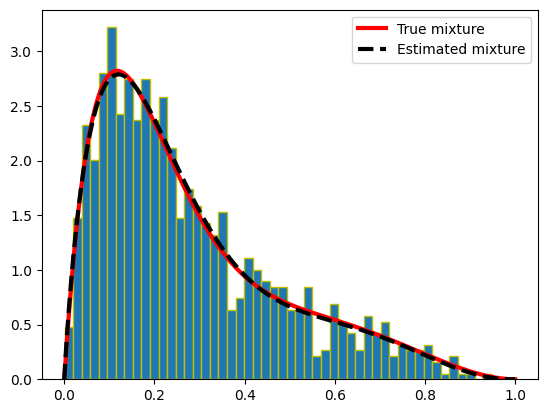

In [4]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import beta, binom
 
# set up the parameters --------------
pi1, a1, b1, a2, b2 = 0.7, 2, 9, 3, 3
# draw the mixture pdf ---------------
f = lambda x: pi1 * beta.pdf(x, a1, b1) + (1-pi1) * beta.pdf(x, a2, b2)
x = np.linspace(0, 1, 1000)
plt.plot(x, f(x), color = 'r', linewidth = 3, label = 'True mixture')
# generate the simulated sample -------
n = 1000
n1 = binom.rvs(n, pi1)
n2 = n - n1
sample = np.r_[beta.rvs(a1, b1, size = n1),
beta.rvs(a2, b2, size = n2)]
# plot histogram ------------------------
plt.hist(sample, 50, edgecolor = 'y', density = True)
# max mle (min -mle) --------------------
L = lambda x : -np.sum(np.log(x[0] * beta.pdf(sample, x[1], x[2]) + (1 - x[0]) * beta.pdf(sample, x[3], x[4])))
# the constraints, bounds and options
cons = []
bnds = [(0, 1), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf)]
opts = dict(disp = True, maxiter = 1e4)
x0 = [0.5, 1, 10, 5, 5] # initial guess
res = opt.minimize(L, x0 = x0, 
    bounds = bnds,
    constraints = cons,
    options = opts,
    tol = 1e-8)
# show the results and comapre to res.fun with population parameters
print(res)    
# print(L([pi1, a1, b1, a2, b2])) # the function value of the initial guess
# plot the estimated mixture pdf
f_hat = lambda x: res.x[0] * beta.pdf(x, res.x[1], res.x[2]) + (1-res.x[0]) * beta.pdf(x, res.x[3], res.x[4])
plt.plot(x, f_hat(x), color = 'k', linestyle = '--', \
    linewidth = 3, label = 'Estimated mixture')
plt.legend()
plt.show()

**<font color=skyblue>注意事項與討論：</font>**<br>
這是限制式條件的最大值問題，限制式是: 0 \leq\pi_1\leq 1, 0 < a_1, b_1, a_2, b_2 < \infty.

指令 minimize 內建的演算法是 L-BFGS-B.
<hr>

### 習題 1：混合常態參數估計 Normal Mixture ###

1-1 設計兩組情況：一組之 $\mu_1$, $\mu_2$ 較接近（視覺上好像只有一組），另一組分開較遠些（視覺上看出兩個常態混合），此部分用直方圖呈現。 <br>

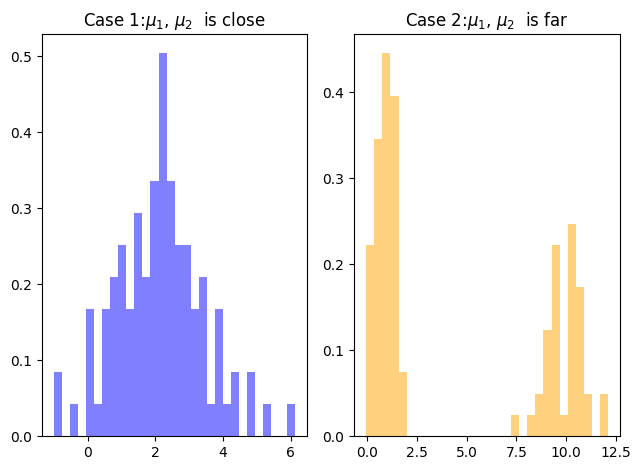

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize


# 生成資料
def generate_data(params, size=100):
    pi_1, mu_1, sigma_1, mu_2, sigma_2 = params
    data_1 = np.random.normal(mu_1, sigma_1, int(size * pi_1))
    data_2 = np.random.normal(mu_2, sigma_2, int(size * (1 - pi_1)))
    data = np.concatenate([data_1, data_2])
    return data

# 設定兩種情況的參數
params_case1 = [0.7, 2, 1, 3, 1.5]  # 接近的情況
params_case2 = [0.6, 1, 0.5, 10, 1]  # 分開的情況

# 生成資料
data_case1 = generate_data(params_case1)
data_case2 = generate_data(params_case2)

# 繪製情況一的直方圖
plt.subplot(1, 2, 1)
plt.hist(data_case1, bins=30, density=True, alpha=0.5, color='blue', label='Case 1')
plt.title('Case 1:$ \mu_1$, $\mu_2$  is close')

# 繪製情況二的直方圖
plt.subplot(1, 2, 2)
plt.hist(data_case2, bins=30, density=True, alpha=0.5, color='orange', label='Case 2')
plt.title('Case 2:$ \mu_1$, $\mu_2$  is far')

# 顯示圖形
plt.tight_layout()
plt.show()



**<font color=skyblue>注意事項與討論：</font>**<br>
- 自定義函式generate_data作為合成函數的輸出，其中np.random.normal()函式用來產生常態分配的隨機變數，最後使用np.concatenate()將兩組資料合併成一組。<br>
- 特別注意混合常態的樣本數，兩者的size可以不同，但相加必須為1，因為pdf的機率總和為1。因此第二個分布的size為1-第一個的size。<br>
- 在直方圖中可以調整"bins"，有助於方便觀察顯示資料的分布情況，該數值越大越細緻，但要注意不能過大或過小導致不易觀察的情形。<br>
- 用直方圖可以看到左邊的圖形，兩個常態分配的參數較接近，因此視覺上看起來只有一組，而右邊的圖形，兩個常態分配的參數較遠，因此視覺上看起來有兩組。<br>

1-2 如同上題的內容，但改用pdf呈現兩組之間的差異，更可以直觀的了解不同。 <br>

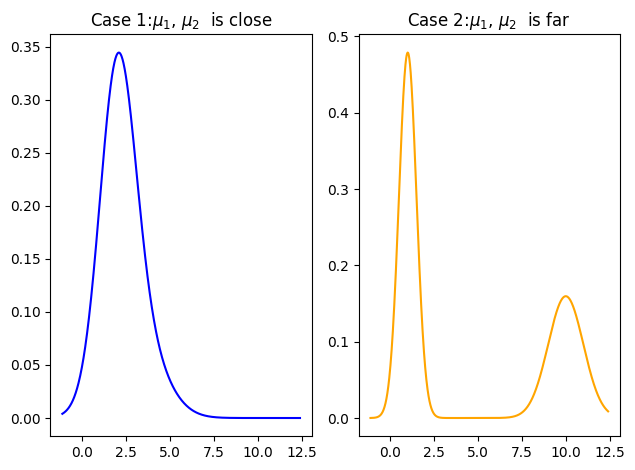

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# 生成資料
def generate_data(params, size=100):
    pi_1, mu_1, sigma_1, mu_2, sigma_2 = params
    data_1 = np.random.normal(mu_1, sigma_1, int(size * pi_1))
    data_2 = np.random.normal(mu_2, sigma_2, int(size * (1 - pi_1)))
    data = np.concatenate([data_1, data_2])
    return data

# 設定兩種情況的參數
params_case1 = [0.7, 2, 1, 3, 1.5]  # 接近的情況
params_case2 = [0.6, 1, 0.5, 10, 1]  # 分開的情況

# 生成資料
data_case1 = generate_data(params_case1)
data_case2 = generate_data(params_case2)

# 定義 PDF 函數
def gaussian_pdf(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# 產生 x 值範圍
x_range = np.linspace(min(min(data_case1), min(data_case2)), max(max(data_case1), max(data_case2)), 1000)

# 計算 PDF 值
pdf_case1 = params_case1[0] * gaussian_pdf(x_range, params_case1[1], params_case1[2]) + \
            (1 - params_case1[0]) * gaussian_pdf(x_range, params_case1[3], params_case1[4])

pdf_case2 = params_case2[0] * gaussian_pdf(x_range, params_case2[1], params_case2[2]) + \
            (1 - params_case2[0]) * gaussian_pdf(x_range, params_case2[3], params_case2[4])

# 繪製 2x1 圖
plt.subplot(1, 2, 1)
plt.plot(x_range, pdf_case1, color='blue', label='98')
plt.title('Case 1:$ \mu_1$, $\mu_2$  is close')

plt.subplot(1, 2, 2)
plt.plot(x_range, pdf_case2, color='orange', label='Case 2')
plt.title('Case 2:$ \mu_1$, $\mu_2$  is far')

# 调整子图之间的间距
plt.tight_layout()

plt.show()


**<font color=skyblue>注意事項與討論：</font>**<br>
- 再定義一個函式gaussian_pdf()，計算混合常態的pdf，再用 NumPy 中的 linspace 函數生成一個包含 1000 個點的 x_range，範圍由資料 data_case1 和 data_case2 中的最小值到最大值決定，生成平滑的曲線。<br>
- 使用平滑曲線更容易觀察到兩組資料的差異，確實兩個常態分配的參數較接近，在視覺上看起來只有一組，而參數較遠的在視覺上看起來有兩組。<br>

1-3 設定更加多元的參數，生成六種混合常態的機率密度圖，觀察混合常態的分布情形。 <br>

C:\Users\SHI\AppData\Local\Temp\ipykernel_25752\1886845477.py:25: RuntimeWarning: invalid value encountered in log
  log_likelihood_values = np.log(mixture_pdf(data, params))


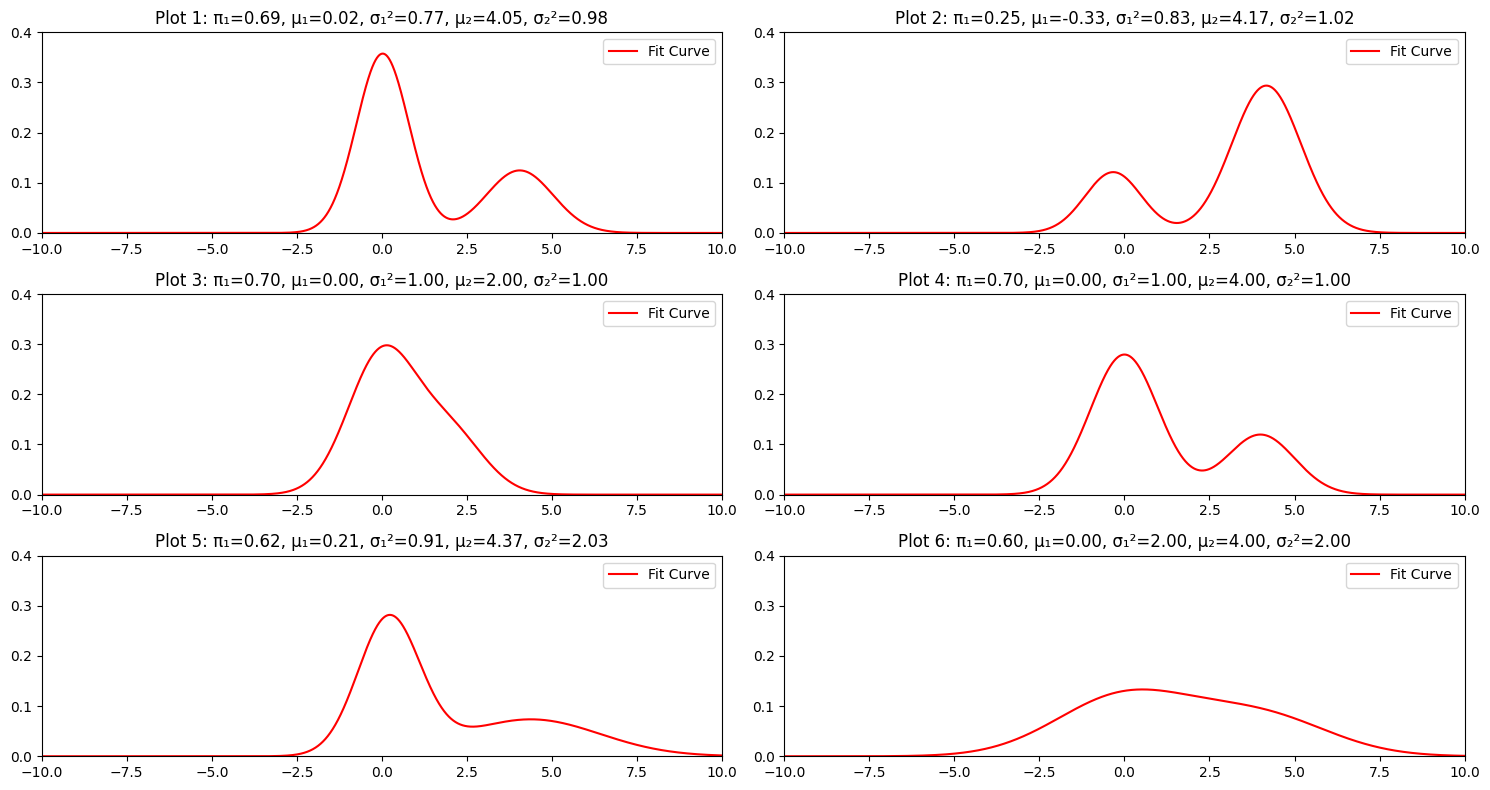

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

np.random.seed(43)

# 生成資料
def generate_data(params, size=100):
    pi_1, mu_1, sigma_1, mu_2, sigma_2 = params
    data_1 = np.random.normal(mu_1, sigma_1, int(size * pi_1))
    data_2 = np.random.normal(mu_2, sigma_2, int(size * (1 - pi_1)))
    data = np.concatenate([data_1, data_2])
    return data

# 定義混合模型概率密度函數
def mixture_pdf(x, params):
    pi_1, mu_1, sigma_1, mu_2, sigma_2 = params
    pdf = pi_1 * norm.pdf(x, mu_1, sigma_1) + (1 - pi_1) * norm.pdf(x, mu_2, sigma_2)
    return pdf

# 定義對數聯合概似函數
def log_likelihood(params, data):
    pi_1, mu_1, sigma_1, mu_2, sigma_2 = params
    log_likelihood_values = np.log(mixture_pdf(data, params))
    return -np.sum(log_likelihood_values)

# 提供的六組參數
parameters_list = [
    [0.7, 0, 0.8, 4, 1],
    [0.25, 0, 0.8, 4, 1],
    [0.7, 0, 1, 2, 1],
    [0.7, 0, 1, 4, 1],
    [0.6, 0, 1, 4, 2],
    [0.6, 0, 2, 4, 2],
]

# 生成2*3的子圖
fig, axes = plt.subplots(3, 2, figsize=(15, 8))

for i, params in enumerate(parameters_list):
    # 生成資料
    data = generate_data(params)
    
    # 進行參數估計
    result = minimize(log_likelihood, params, args=(data,), method='L-BFGS-B')
    estimated_params = result.x
    
    # 繪製擬合曲線
    x_range = np.linspace(-10, 10, 1000000)
    y_range = mixture_pdf(x_range, estimated_params)
    
    # 繪製直方圖
    row = i // 2
    col = i % 2
    axes[row, col].plot(x_range, y_range, color='red', label='Fit Curve')
    axes[row, col].set_xlim([-10, 10])
    axes[row, col].set_ylim([0, 0.4])
    axes[row, col].legend()
    
    # 加上標題
    title = f'Plot {i+1}: π₁={estimated_params[0]:.2f}, μ₁={estimated_params[1]:.2f}, σ₁²={estimated_params[2]:.2f}, μ₂={estimated_params[3]:.2f}, σ₂²={estimated_params[4]:.2f}'
    axes[row, col].set_title(title)


# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>注意事項與討論：</font>**<br>
- π₁（混合比例）：影響混合分佈中每個組分的權重： π₁ 表示第一個組分的權重，即資料來自第一個組分的概率。1 - π₁ 表示第二個組分的權重。這個參數影響了每個組分對整體分佈的貢獻程度。當 π₁ 越大，第一個組分的貢獻越大，第二個組分的貢獻越小，反之亦然。由圖一和圖二我們可以觀察到，其他參數相同的情況下，π₁越大則第一組的分布越明顯。<br>
- μ（常態分佈的平均數）：控制某一組的中心位置，當兩組的μ越分散，則混合常態的兩個分佈越明顯，反之亦然。由圖三和圖四我們可以觀察到，其他參數相同的情況下，μ為1與5的圖四分布更加與兩組分布相似。<br>
- σ²（正態分佈的變異數）：控制某一組的分散程度： σ₁² 決定了第一組分佈的數據點分散的程度。圖五和圖六中，σ₁²越小，第一組分布越集中，反之亦然。<br>
- 在參數的設定上，出現參數與實際圖表參數有些微差別的情形，運行中收斂到不同的局部極小值。確實會有參數初始值使某些資料得到不好的估計值，需要多次嘗試才能得到較好的結果。<br>
- 設定隨機種子： 在生成資料和優化過程中使用相同的隨機種子，這將確保在不同運行中使用相同的隨機性。

2-1 總樣本數 n= 50, 100, 300, 500, 1000, 10000。藉以評估樣本數大小對估計值的影響。

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -20.81867682744901
        x: [ 7.596e-01  2.010e+00  8.947e+00  1.033e+01  7.666e+00]
      nit: 35
      jac: [ 2.213e-03 -8.953e-05  3.482e-05 -9.273e-05  8.349e-05]
     nfev: 246
     njev: 41
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -29.732963782830982
        x: [ 8.617e-01  1.374e+00  4.310e+00  1.311e+01  6.162e+00]
      nit: 39
      jac: [ 3.126e-05  5.898e-05 -5.684e-06 -4.263e-06  7.461e-06]
     nfev: 264
     njev: 44
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -115.84468659778123
        x: [ 8.390e-01  1.705e+00  6.348e+00  4.447e+00  2.929e+00]
      nit: 26
      jac: [ 7.697e-03 -1.901e-03  3.737e-04 -1.492e-04  2.700e-05]
     nfev: 192
     njev

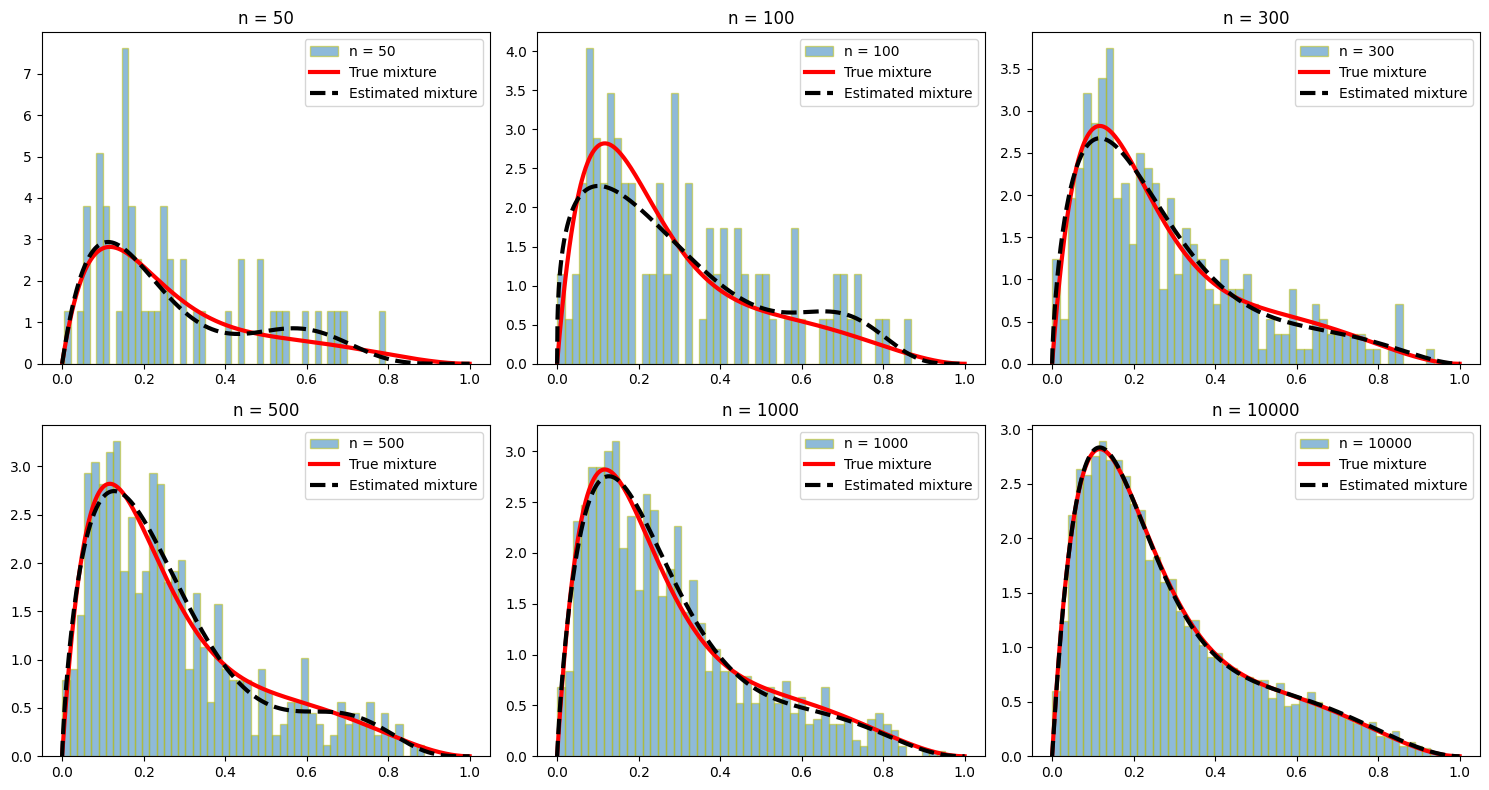

In [53]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

# set up the parameters --------------
pi1, a1, b1, a2, b2 = 0.7, 2, 9, 3, 3
# draw the mixture pdf ---------------
f = lambda x: pi1 * beta.pdf(x, a1, b1) + (1 - pi1) * beta.pdf(x, a2, b2)
x = np.linspace(0, 1, 1000)

# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# generate the simulated sample -------
n_values = [50, 100, 300, 500, 1000, 10000]
for i, n in enumerate(n_values):
    np.random.seed(123)
    n1 = binom.rvs(n, pi1)
    n2 = n - n1
    sample = np.r_[beta.rvs(a1, b1, size=n1),
                   beta.rvs(a2, b2, size=n2)]
    
    # Calculate the row and column indices for the subplot
    row_index, col_index = divmod(i, 3)
    
    # plot histogram on the i-th subplot
    axes[row_index, col_index].hist(sample, 50, edgecolor='y', density=True, alpha=0.5, label=f'n = {n}')
    axes[row_index, col_index].set_title(f'n = {n}')

    # max mle (min -mle) --------------------
    L = lambda x: -np.sum(np.log(x[0] * beta.pdf(sample, x[1], x[2]) + (1 - x[0]) * beta.pdf(sample, x[3], x[4])))
    # the constraints, bounds, and options
    cons = []
    bnds = [(0, 1), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf)]
    opts = dict(disp=True, maxiter=1e4)
    x0 = [0.5, 1, 10, 5, 5]  # initial guess
    res = opt.minimize(L, x0=x0,
                    bounds=bnds,
                    constraints=cons,
                    options=opts,
                    tol=1e-8)
    # show the results and compare to res.fun with population parameters
    print(res)
    
    # plot the estimated mixture pdf
    f_hat = lambda x: res.x[0] * beta.pdf(x, res.x[1], res.x[2]) + (1 - res.x[0]) * beta.pdf(x, res.x[3], res.x[4])

    # Plot the true mixture on the last subplot
    axes[row_index, col_index].plot(x, f(x), color='r', linewidth=3, label='True mixture')

    # Plot the estimated mixture on the last subplot
    axes[row_index, col_index].plot(x, f_hat(x), color='k', linestyle='--', linewidth=3, label='Estimated mixture')
    axes[row_index, col_index].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**<font color=skyblue>注意事項與討論：</font>**<br>
- 使用 opt.minimize 函數執行最大概似估計，找到最大化觀察數據對混合模型的概似性的參數。將負對數概似性（L）定義為一個 lambda 函數。
- cons: 約束條件（constraints）的參數，目前是一個空列表，表示沒有額外的約束條件。
- bnds: 參數的邊界條件（bounds）。每個元素是一個元組，代表對應參數的範圍。例如，(0, 1) 表示第一個參數的範圍在 0 到 1 之間，(0, np.inf) 表示其他四個參數的範圍在 0 到正無窮大之間。
- opts: 優化算法的選項，是一個字典。disp=True 表示要顯示最佳化的詳細信息，maxiter=1e4 表示設定最大迭代次數為 1 萬次。
- x0: 優化算法的起始點，即參數的初始猜測值。在這裡，使用 [0.5, 1, 10, 5, 5] 作為初始猜測值。
- L: 被最小化的目標函數，即負對數概似性（negative log-likelihood）。
- bounds: 被最小化的參數的範圍限制，由 bnds 提供。
- constraints: 被最小化的目標函數的額外約束條件，由 cons 提供。
- options: 優化算法的其他選項，由 opts 提供。
- tol: 收斂容忍度，即當梯度變化小於這個值時，停止最佳化。
<br><br>我們可以觀察到，當樣本數越大，估計值越接近真實值的曲線，最終將近完美重疊，因此我們可以推斷在此樣本數越大，估計值將會越準確。<br>

2-2 調整不同的參數，了解是否樣本增加，估計值是否會更接近真實值。

c:\Users\SHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1983: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: nan
        x: [ 1.227e-01  9.664e-01  3.908e-01  2.370e+00  1.231e+00]
      nit: 32
      jac: [ 7.861e-01 -2.365e-01  8.308e-01  1.855e-01  9.033e-01]
     nfev: 282
     njev: 47
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 157.3143407593999
        x: [ 8.220e-01  2.029e+00  1.023e+00  3.861e+00  5.415e-01]
      nit: 18
      jac: [-3.638e-04 -1.137e-04  2.871e-04 -4.832e-05 -4.178e-04]
     nfev: 132
     njev: 22
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 451.3145319364326
        x: [ 9.001e-01  2.283e+00  1.038e+00  2.133e+00  1.473e+00]
      nit: 41
      jac: [-3.115e-03 -1.944e-03  1.540e-03 -1.990e-04  1.199e-03]
     nfev: 294
     njev: 49
 hess_inv: <5x5 LbfgsInvHessPr

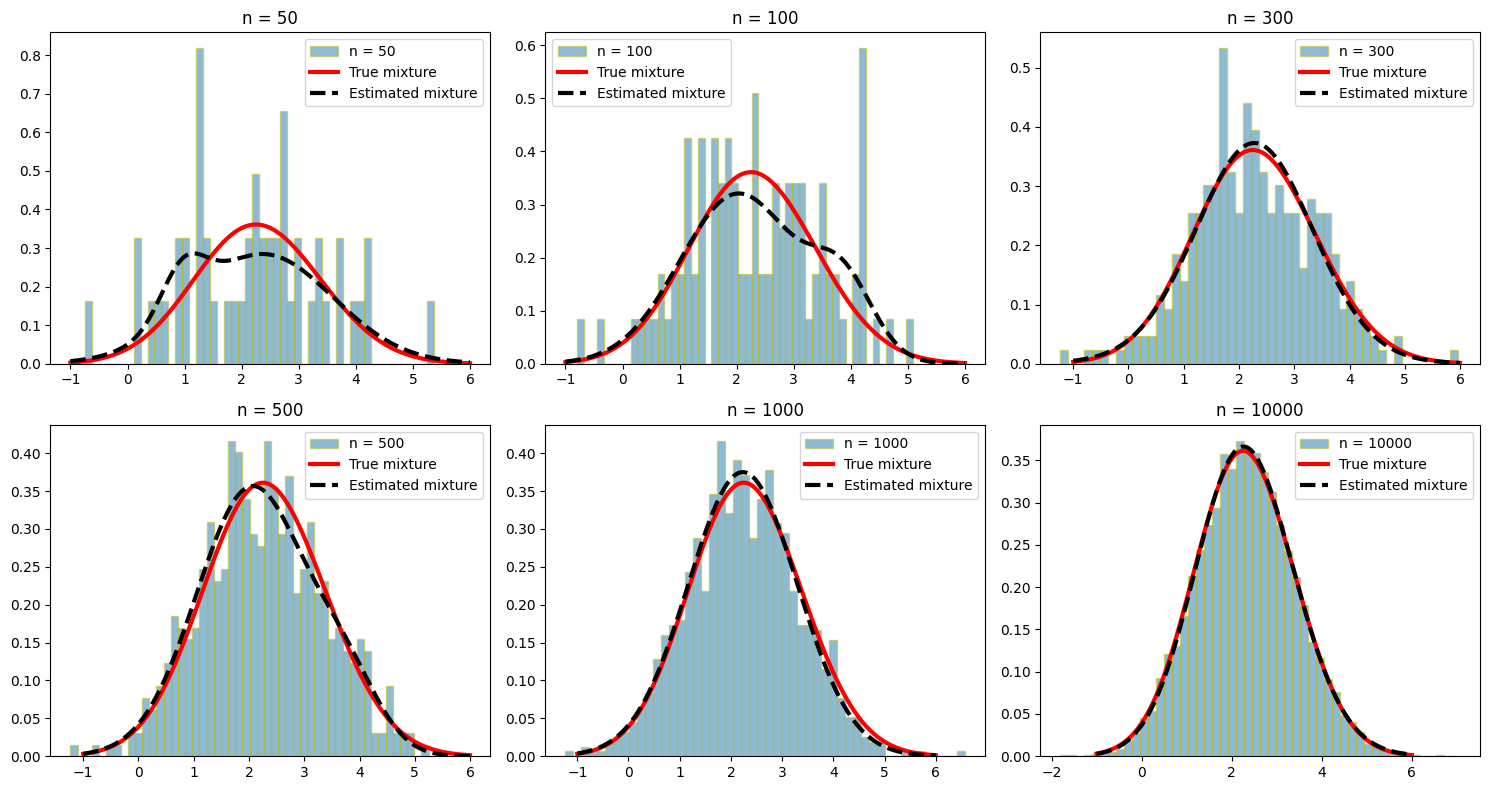

In [76]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

# set up the parameters --------------
pi1, mean1, std1, mean2, std2 = 0.7, 2, 1, 3, 1
# draw the mixture pdf ---------------
f = lambda x: pi1 * norm.pdf(x, mean1, std1) + (1 - pi1) * norm.pdf(x, mean2, std2)
x = np.linspace(-1, 6, 1000)

# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# generate the simulated sample -------
n_values = [50, 100, 300, 500, 1000, 10000]
for i, n in enumerate(n_values):
    np.random.seed(123)
    n1 = binom.rvs(n, pi1)
    n2 = n - n1
    sample = np.r_[norm.rvs(mean1, std1, size=n1),
                   norm.rvs(mean2, std2, size=n2)]
    
    # Calculate the row and column indices for the subplot
    row_index, col_index = divmod(i, 3)
    
    # plot histogram on the i-th subplot
    axes[row_index, col_index].hist(sample, 50, edgecolor='y', density=True, alpha=0.5, label=f'n = {n}')
    axes[row_index, col_index].set_title(f'n = {n}')

    # max mle (min -mle) --------------------
    L = lambda x: -np.sum(np.log(x[0] * norm.pdf(sample, x[1], x[2]) + (1 - x[0]) * norm.pdf(sample, x[3], x[4])))
    # the constraints, bounds, and options
    cons = []
    bnds = [(0, 1), (-np.inf, np.inf), (0, np.inf), (-np.inf, np.inf), (0, np.inf)]
    opts = dict(disp=True, maxiter=1e4)
    x0 = [0.5, 1, 1, 4, 1]  # initial guess
    res = opt.minimize(L, x0=x0,
                    bounds=bnds,
                    constraints=cons,
                    options=opts,
                    tol=1e-8)
    # show the results and compare to res.fun with population parameters
    print(res)
    
    # plot the estimated mixture pdf
    f_hat = lambda x: res.x[0] * norm.pdf(x, res.x[1], res.x[2]) + (1 - res.x[0]) * norm.pdf(x, res.x[3], res.x[4])

    # Plot the true mixture on the last subplot
    axes[row_index, col_index].plot(x, f(x), color='r', linewidth=3, label='True mixture')

    # Plot the estimated mixture on the last subplot
    axes[row_index, col_index].plot(x, f_hat(x), color='k', linestyle='--', linewidth=3, label='Estimated mixture')
    axes[row_index, col_index].legend()

# Adjust layout
plt.tight_layout()
plt.show()

**<font color=skyblue>注意事項與討論：</font>**<br>
在此圖形我們可以發現，不同的參數設定下，當樣本數越大，估計值越接近真實值的曲線，與參數的調整無關。<br>

3-1 加入 sklearn.mixture.GaussianMixture 的 EM 演算法做比較，並且列出兩者的估計參數值表格。

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -20.81867682744901
        x: [ 7.596e-01  2.010e+00  8.947e+00  1.033e+01  7.666e+00]
      nit: 35
      jac: [ 2.213e-03 -8.953e-05  3.482e-05 -9.273e-05  8.349e-05]
     nfev: 246
     njev: 41
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -29.732963782830982
        x: [ 8.617e-01  1.374e+00  4.310e+00  1.311e+01  6.162e+00]
      nit: 39
      jac: [ 3.126e-05  5.898e-05 -5.684e-06 -4.263e-06  7.461e-06]
     nfev: 264
     njev: 44
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -115.84468659778123
        x: [ 8.390e-01  1.705e+00  6.348e+00  4.447e+00  2.929e+00]
      nit: 26
      jac: [ 7.697e-03 -1.901e-03  3.737e-04 -1.492e-04  2.700e-05]
     nfev: 192
     njev

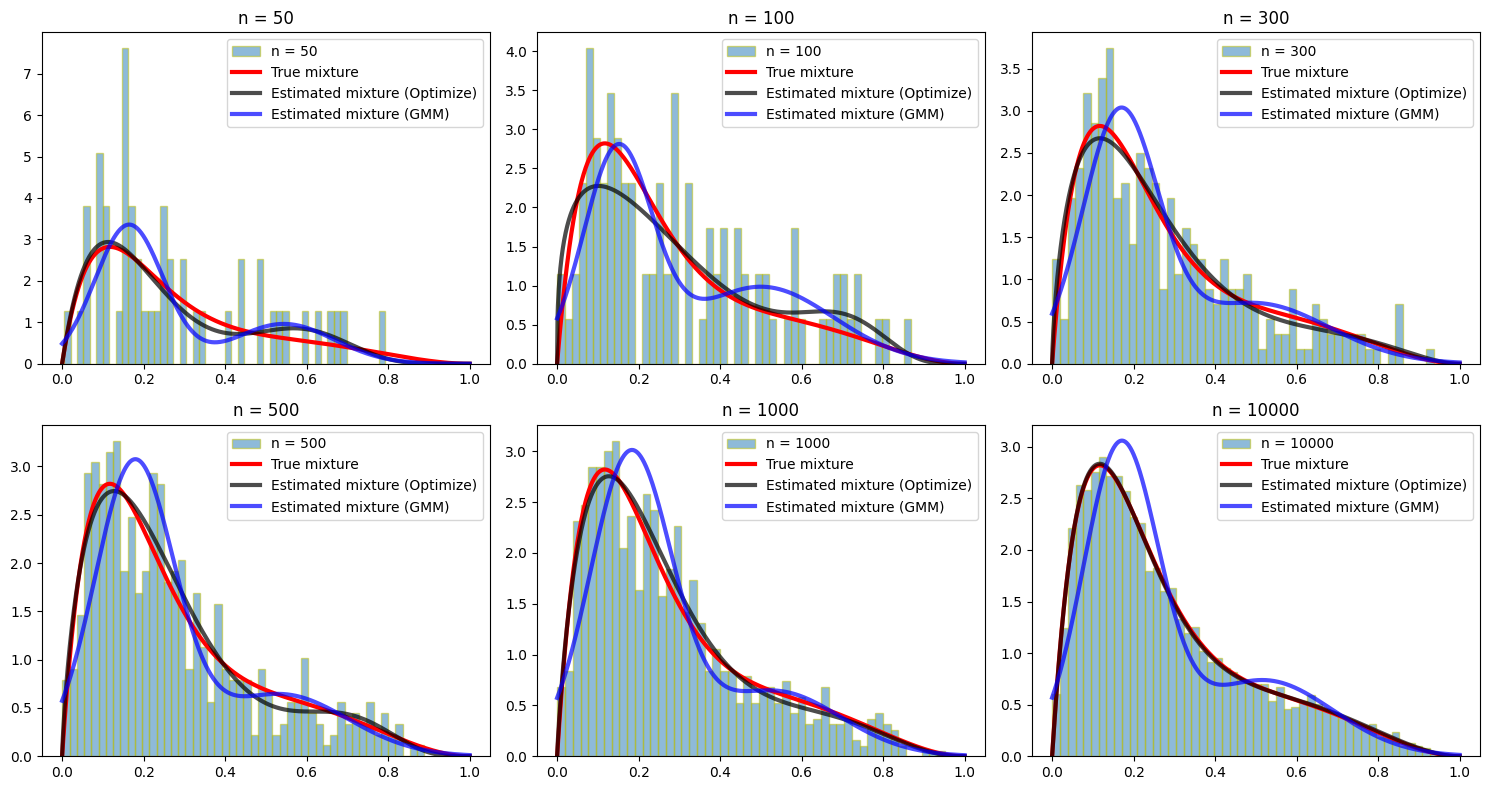

+-------------------+-------+------------+----------+----------------+------------+----------+----------------+
| Method            |     n |   Weight_1 |   Mean_1 |   Covariance_1 |   Weight_2 |   Mean_2 |   Covariance_2 |
+===================+=======+============+==========+================+============+==========+================+
| Optimize.minimize |    50 |   0.694846 | 2.02017  |     9.18273    |   2.95145  | 2.93303  |                |
+-------------------+-------+------------+----------+----------------+------------+----------+----------------+
| GaussianMixture   |    50 |   0.685681 | 0.168141 |     0.00848125 |   0.314319 | 0.518805 |      0.0289218 |
+-------------------+-------+------------+----------+----------------+------------+----------+----------------+
| Optimize.minimize |   100 |   0.694846 | 2.02017  |     9.18273    |   2.95145  | 2.93303  |                |
+-------------------+-------+------------+----------+----------------+------------+----------+----------

In [75]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import beta, binom
from sklearn.mixture import GaussianMixture
from tabulate import tabulate 

parameter_values = []
# set up the parameters --------------
pi1, a1, b1, a2, b2 = 0.7, 2, 9, 3, 3
# draw the mixture pdf ---------------
f = lambda x: pi1 * beta.pdf(x, a1, b1) + (1 - pi1) * beta.pdf(x, a2, b2)
x = np.linspace(0, 1, 1000)

# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# generate the simulated sample -------
n_values = [50, 100, 300, 500, 1000, 10000]
for i, n in enumerate(n_values):
    np.random.seed(123)
    n1 = binom.rvs(n, pi1)
    n2 = n - n1
    sample = np.r_[beta.rvs(a1, b1, size=n1),
                   beta.rvs(a2, b2, size=n2)]
    
    # Calculate the row and column indices for the subplot
    row_index, col_index = divmod(i, 3)
    
    # plot histogram on the i-th subplot
    axes[row_index, col_index].hist(sample, 50, edgecolor='y', density=True, alpha=0.5, label=f'n = {n}')
    axes[row_index, col_index].set_title(f'n = {n}')

    # max mle (min -mle) --------------------
    L = lambda x: -np.sum(np.log(x[0] * beta.pdf(sample, x[1], x[2]) + (1 - x[0]) * beta.pdf(sample, x[3], x[4])))
    # the constraints, bounds, and options
    cons = []
    bnds = [(0, 1), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf)]
    opts = dict(disp=True, maxiter=1e4)
    x0 = [0.5, 1, 10, 5, 5]  # initial guess
    res = opt.minimize(L, x0=x0,
                    bounds=bnds,
                    constraints=cons,
                    options=opts,
                    tol=1e-8)
    # show the results and compare to res.fun with population parameters
    print(res)
    
    # Gaussian Mixture Model estimation
    gmm = GaussianMixture(n_components=2)
    gmm.fit(sample.reshape(-1, 1))
    
    # plot the estimated mixture pdf using optimize.minimize
    f_hat_optimize = lambda x: res.x[0] * beta.pdf(x, res.x[1], res.x[2]) + (1 - res.x[0]) * beta.pdf(x, res.x[3], res.x[4])
    
    # plot the estimated mixture pdf using Gaussian Mixture Model
    f_hat_gmm = lambda x: np.exp(gmm.score_samples(x.reshape(-1, 1)))
    
    # Plot the true mixture on the last subplot
    axes[row_index, col_index].plot(x, f(x), color='r', linewidth=3, label='True mixture')

    # Plot the estimated mixture using optimize.minimize
    axes[row_index, col_index].plot(x, f_hat_optimize(x), color='k', alpha=0.7,linestyle='-', linewidth=3, label='Estimated mixture (Optimize)')

    # Plot the estimated mixture using Gaussian Mixture Model
    axes[row_index, col_index].plot(x, f_hat_gmm(x), color='b', alpha=0.7,linestyle='-', linewidth=3, label='Estimated mixture (GMM)')

    axes[row_index, col_index].legend()

# Adjust layout
plt.tight_layout()
plt.show()
for i, n in enumerate(n_values):
    parameter_values.append(["Optimize.minimize", n] + list(res.x))
    gmm = GaussianMixture(n_components=2)
    gmm.fit(sample.reshape(-1, 1))
    parameter_values.append(["GaussianMixture", n, gmm.weights_[0], gmm.means_[0][0], gmm.covariances_[0][0], gmm.weights_[1], gmm.means_[1][0], gmm.covariances_[1][0]])

# Display the results in a table
headers = ["Method", "n", "Weight_1", "Mean_1", "Covariance_1", "Weight_2", "Mean_2", "Covariance_2"]
print(tabulate(parameter_values, headers=headers, tablefmt="grid"))




**<font color=skyblue>注意事項與討論：</font>**<br>
- GaussianMixture 的輸入資料為矩陣型態，大小為 n x p，n 為樣本數，p 為變數個數。在此為單變量函數，資料型態為 n x 1，須加上 sample.reshape(-1, 1)，以符合輸入資料的格式。<br>
- gmm.fit() 是用於擬合高斯混合模型 (Gaussian Mixture Model, GMM) 的方法，通常是在使用機器學習庫（如Scikit-Learn）時使用。
- 在n=10000時，我們可以觀察到Optimize的估計曲線更加接近真實值，但是GaussianMixture的估計曲線卻偏離許多，因此我們可以推斷在此樣本數越大，Optimize的估計值將會越準確。<br>
- 最後我使用 tabulate 來呈現參數的設定。<br>

<hr>

### 習題 2：限制式條件的最大值問題 Constraint optimization ###

1. 確認資料檔，並取出資料並觀察資料的樣子

In [27]:
import numpy as np
data_dir = 'C:/Users/SHI/OneDrive/PythonCodes/StatComp/'
# Load data from the file
data = np.loadtxt(data_dir+'UV.txt', comments='%')
u,v=data[:,0],data[:,1]
n=data.shape[0]
print(u)
print(v)

[0.7682156 0.8767442 1.2123116 3.4094091 1.0629694 0.4495693 0.8789534
 0.6466784 0.3152598 0.5008881 0.2004936 0.4695486 0.9414701 0.9609428
 0.5703689 0.2729225 0.2284058 0.516521  1.1285071 1.5779443 0.3060923
 0.154763  1.0372218 1.0824315 0.4391443 0.832555  0.4211078 0.5457312
 0.4095959 0.6876466 1.8342681 1.8431507 1.5730947 1.0111777 1.4417695
 1.7207421 0.772964  0.5430361 1.5014328 0.7931465 0.1639931 1.7345422
 0.6726345 1.5337026 1.2249964 1.1644411 0.2759018 0.3922483 0.8182332
 0.5217467 0.3041502 0.4617526 0.9533329 0.4288281 0.6281591 1.5098535
 0.4663509 0.381821  0.2164452 2.6915221 0.5134074 1.1619964 0.8098859
 0.2663909 0.6694528 0.7999975 1.2796056 0.3805691 0.7487492 0.5725123
 1.3150433 0.8890993 0.5768558 2.3609733 0.2651396 0.6349287 0.3952174
 1.3888209 0.3636349 0.2622856 0.921949  1.3447413 0.1322548 0.2843492
 0.4586097 1.0443719 0.9053494 0.5456009 0.4868005 1.5567396 0.2867196
 0.4012349 0.2817074 1.1341219 0.1778313 1.2413968 0.5383914 0.895801
 0.6306

**<font color=skyblue>注意事項與討論：</font>**<br>
- np.loadtxt用於從文本檔案中讀取數據。在這裡讀取文件 'UV.txt' 中的數據，並將其存儲在 data 中。
- comments='%``: 這個參數指定了用於表示註釋的字符，任何以 %` 開頭的行都被視為註釋並被忽略。
- u, v分別將 data 中的第一列和第二列數據分配給變數 u 和 v。

2. 將函式推到最精簡，並計算最大概似估計值

In [16]:
import numpy as np
from scipy.optimize import minimize

# 載入數據
data_dir = 'C:/Users/SHI/OneDrive/PythonCodes/StatComp/'
data = np.loadtxt(data_dir + 'UV.txt', comments='%')
u, v = data[:, 0], data[:, 1]

# 定義對數概似函數
def log_likelihood(params):
    alpha, beta = params
    log_likelihood_value = 0

    for i in range(len(u)):
        term1 = np.log(alpha) + np.log(beta) + (beta - 1) * np.log(v[i])
        term2 = -alpha * v[i] ** beta
        term3 = -np.log(1 - np.exp(-alpha * u[i] ** beta))

        log_likelihood_value += term1 + term2 + term3

    return -log_likelihood_value  # 注意 minimize 是找最小值，因此加上負號

# 初值設定
initial_params = [1.0, 1.0]

# 最大化對數概似函數
result = minimize(log_likelihood, initial_params, method='L-BFGS-B', bounds=[(0, None), (0, None)])

# 提取估計的 alpha 和 beta
estimated_alpha, estimated_beta = result.x

# 印出結果
print("Maximum Likelihood Estimation:")
print("MLE Alpha:", estimated_alpha)
print("MLE Beta:", estimated_beta) 




Maximum Likelihood Estimation:
MLE Alpha: 1.9073500271253478
MLE Beta: 0.9464389452713111


**<font color=skyblue>注意事項與討論：</font>**<br>
- 定義對數概似函數 (log_likelihood)，包含兩個參數 alpha 和 beta 的列表。
使用迴圈遍歷數據集 u 和 v，其中三個項加在一起，構成了對數概似函數的計算。最終的目標是尋找能夠最小化（最大化對數概似的負值）的 α 和 β 參數。這樣的優化過程有助於找到最能夠解釋觀測數據的模型參數。
- 到最後的返回值加上了負號，因為 minimize 的目標是最小化函數，而我們要找的是最大對數概似，所以需要加上負號。
- 使用的優化算法是 L-BFGS-B。


3. 利用推導到精簡的目標函數，繪製立體圖

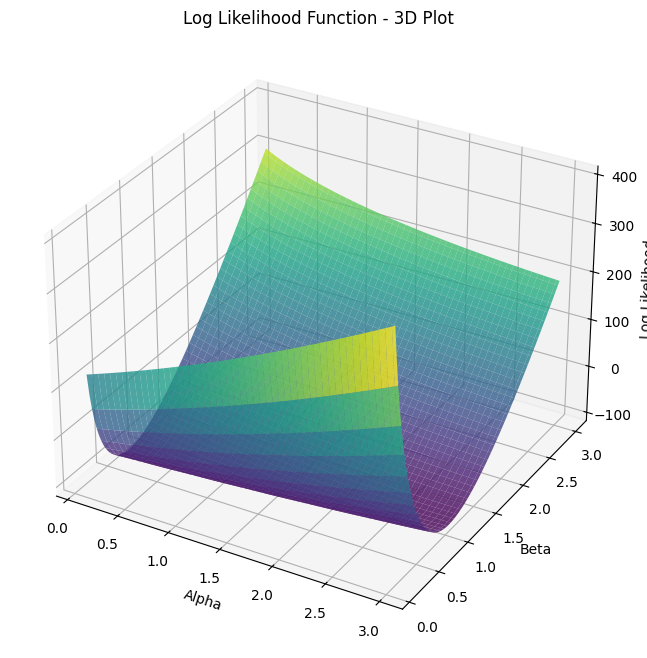

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 載入數據
data_dir = 'C:/Users/SHI/OneDrive/PythonCodes/StatComp/'
data = np.loadtxt(data_dir + 'UV.txt', comments='%')
u, v = data[:, 0], data[:, 1]

# 定義對數概似函數
def log_likelihood(params):
    alpha, beta = params
    log_likelihood_value = 0

    for i in range(len(u)):
        term1 = np.log(alpha) + np.log(beta) + (beta - 1) * np.log(v[i])
        term2 = -alpha * v[i] ** beta
        term3 = -np.log(1 - np.exp(-alpha * u[i] ** beta))

        log_likelihood_value += term1 + term2 + term3

    return -log_likelihood_value  # 注意 minimize 是找最小值，因此加上負號

# 初值設定
initial_params = [1.0, 1.0]

# 最大化對數概似函數
result = minimize(log_likelihood, initial_params, method='L-BFGS-B', bounds=[(0, None), (0, None)])

# 提取估計的 alpha 和 beta
estimated_alpha, estimated_beta = result.x



# 繪製立體圖
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 生成 alpha 和 beta 的範圍
alpha_range = np.linspace(0.1, 3, 100)
beta_range = np.linspace(0.1, 3, 100)
alpha_values, beta_values = np.meshgrid(alpha_range, beta_range)
log_likelihood_values = np.zeros_like(alpha_values)

# 計算對數概似函數的值
for i in range(len(alpha_range)):
    for j in range(len(beta_range)):
        log_likelihood_values[i, j] = log_likelihood([alpha_values[i, j], beta_values[i, j]])

# 繪製立體圖
ax.plot_surface(alpha_values, beta_values, log_likelihood_values, cmap='viridis', alpha=0.8)
ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('Log Likelihood')
ax.set_title('Log Likelihood Function - 3D Plot')

# 顯示立體圖
plt.show()



**<font color=skyblue>注意事項與討論：</font>**<br>
- fig.add_subplot(111, projection='3d') 的111是指在一個 1x1 的網格中的第一個 subplot。這裡的 1 表示只有一行，1 表示只有一列，所以總共只有一個 subplot，而projection='3d': 這表示要使用 3D 投影，能夠在 3D 空間中顯示資料。
- np.meshgrid 是 NumPy 中用於創建網格座標矩陣的函數，當在二維平面上表示函數或進行網格運算時，它會返回兩個矩陣 X 和 Y，這兩個矩陣的行數和列數都與輸入的矩陣相同，而兩個矩陣的元素值則是由輸入的矩陣決定的。
- cmap='viridis' 是指定色彩映射（colormap）的參數。在 Matplotlib 中，色彩映射決定了如何將數值映射到顏色的方式。viridis 是一種色彩映射，它將較小的數值映射到藍色，較大的數值映射到黃色。


4.繪製等高線圖，並調整座標位置與等高線數量。

Maximum Likelihood Estimation:
MLE Alpha: 1.907349414144577
MLE Beta: 0.9464388214172281


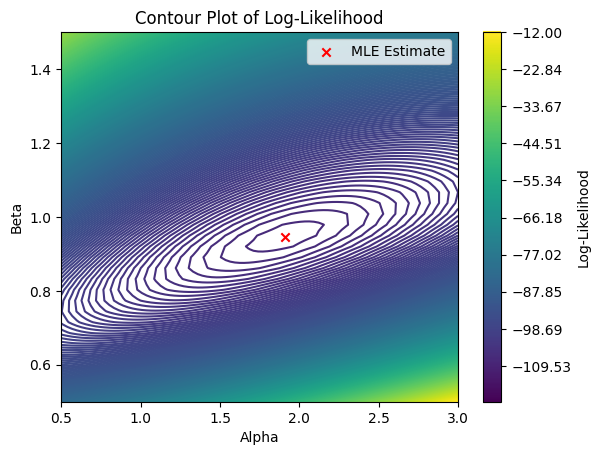

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load data from the file
data_dir = 'C:/Users/SHI/OneDrive/PythonCodes/StatComp/'
data = np.loadtxt(data_dir+'UV.txt', comments='%')
u, v = data[:, 0], data[:, 1]

# Define the likelihood functions
def ft(v, alpha, beta):
    return alpha * beta * v**(beta-1) * np.exp(-alpha * v**beta)

def FT(u, alpha, beta):
    return 1 - np.exp(-alpha * u**beta)

def log_likelihood(params, u, v):
    alpha, beta = params
    likelihood_terms = np.log(ft(v, alpha, beta)) - np.log(FT(u, alpha, beta))
    return -np.sum(likelihood_terms)

# Initial guess for the parameters
initial_params = [1, 1]

# Minimize the negative log-likelihood
result = minimize(log_likelihood, initial_params, args=(u, v))

# Extract MLE parameters
mle_alpha, mle_beta = result.x

# Create a grid of alpha and beta values
alpha_range = np.linspace(0.1, 3, 100)
beta_range = np.linspace(0.1, 3, 100)
alpha_mesh, beta_mesh = np.meshgrid(alpha_range, beta_range)

# Calculate log-likelihood values for each combination of alpha and beta
log_likelihood_values = np.array([[log_likelihood([alpha, beta], u, v) for alpha in alpha_range] for beta in beta_range])

# Plot the contour plot
contour_levels = np.linspace(-120, -12,300)  # Set the specific levels here
contour = plt.contour(alpha_mesh, beta_mesh, log_likelihood_values, levels=contour_levels, cmap='viridis')
plt.colorbar(contour, label='Log-Likelihood')
plt.scatter(mle_alpha, mle_beta, color='red', marker='x', label='MLE Estimate')
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('Contour Plot of Log-Likelihood')
plt.legend()
plt.xlim([0.5, 3])
plt.ylim([0.5, 1.5])
plt.show()


**<font color=skyblue>注意事項與討論：</font>**<br>
- contour_levels 設定了等高線的數量，這裡設定從-12到120共 300條。
- plt.scatter(mle_alpha, mle_beta, color='red', marker='x', label='MLE Estimate')：在圖中標記出最大概似估計值的位置。
- 特別注意座標與level的設定，可以調整觀察顯示資料的分布情況，該數值越大越細緻，但要注意不能過大或過小導致不易觀察的情形，其中就會發生等高線圖中間大部分是空白的情形。<br>